In [ ]:
# REPEAT FOR EYE AND VEHCILE 

In [ ]:
# importing all required libraries
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# loading the results for random forest and xgboost
results1_rf = pd.read_csv("rf_results1.csv")
results2_rf = pd.read_csv("rf_results2.csv")
results3_rf = pd.read_csv("rf_results3.csv")
results4_rf = pd.read_csv("rf_results4.csv")
results5_rf = pd.read_csv("rf_results5.csv")
results6_rf = pd.read_csv("rf_results6.csv")
results7_rf = pd.read_csv("rf_results7.csv")
results8_rf = pd.read_csv("rf_results8.csv")
results9_rf = pd.read_csv("rf_results9.csv")
results10_rf = pd.read_csv("rf_results10.csv")


results1_xgb = pd.read_csv("xgb_results1.csv")
results2_xgb = pd.read_csv("xgb_results2.csv")
results3_xgb = pd.read_csv("xgb_results3.csv")
results4_xgb = pd.read_csv("xgb_results4.csv")
results5_xgb = pd.read_csv("xgb_results5.csv")
results6_xgb = pd.read_csv("xgb_results6.csv")
results7_xgb = pd.read_csv("xgb_results7.csv")
results8_xgb = pd.read_csv("xgb_results8.csv")
results9_xgb = pd.read_csv("xgb_results9.csv")
results10_xgb = pd.read_csv("xgb_results10.csv")

results1_rocket = pd.read_csv("rocketresults_combined1.csv")
results2_rocket = pd.read_csv("rocketresults_combined2.csv")
results3_rocket = pd.read_csv("rocketresults_combined3.csv")
results4_rocket = pd.read_csv("rocketresults_combined4.csv")
results5_rocket = pd.read_csv("rocketresults_combined5.csv")
results6_rocket = pd.read_csv("rocketresults_combined6.csv")
results7_rocket = pd.read_csv("rocketresults_combined7.csv")
results8_rocket = pd.read_csv("rocketresults_combined8.csv")
results9_rocket = pd.read_csv("rocketresults_combined9.csv")
results10_rocket = pd.read_csv("rocketresults_combined10.csv")


In [ ]:
# function to get standard deviation for the 10 splits
def std_dev_10splits(results_list):
    auc_list = []
    for i in results_list:
        # predicted probs for treatment = 1
        prob = i['predicted_prob']
        auc_i = roc_auc_score(i['target'], prob)
        auc_list.append(auc_i)
    return np.std(auc_list)

In [ ]:
# joining the 10 splits and calculating standard
results_list_rf = [results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                results6_rf, results7_rf, results8_rf, results9_rf, results10_rf]

results_list_xgb = [results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb]

results_list_rocket = [results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket]

sdev1_rf = std_dev_10splits(results_list_rf)
sdev1_xgb = std_dev_10splits(results_list_xgb)
sdev1_rocket = std_dev_10splits(results_list_rocket)

In [ ]:
# joining the 10 results dataframes 
stacked_results_rf = pd.concat([results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                               results6_rf, results7_rf, results8_rf, results9_rf, results10_rf], axis = 0)

stacked_results_xgb = pd.concat([results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb], axis = 0)
stacked_results_rocket = pd.concat([results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket], axis = 0)

In [ ]:
stacked_results_xgb

,sample_ID,predicted_prob,target,pred
0,13_10_3A,0.998449,1,1
1,13_11_3A,0.999767,1,1
2,13_12_3A,0.999993,1,1
3,13_13_3A,0.999991,1,1
4,13_14_3A,0.999880,1,1
...,...,...,...,...
4030,20_79_3B,0.999800,1,1
4031,20_7_3B,0.999851,1,1
4032,20_80_3B,0.999866,1,1
4033,20_8_3B,0.999904,1,1


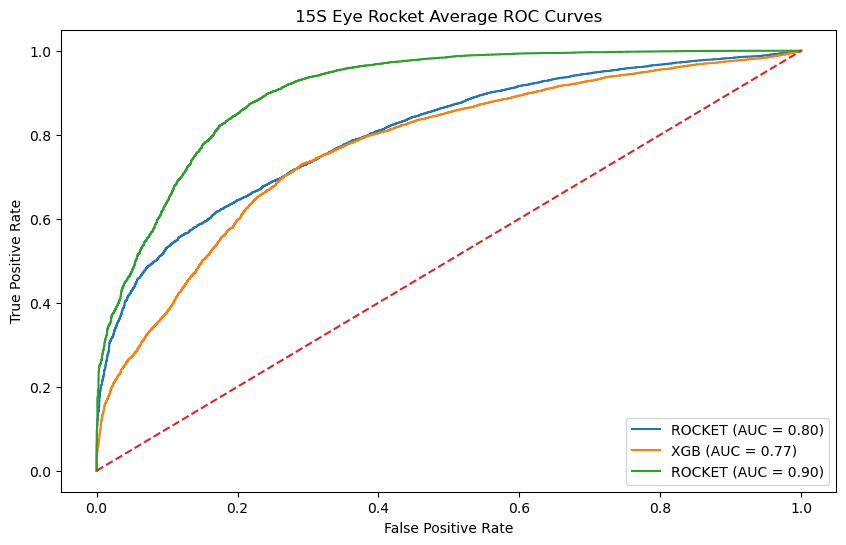

In [ ]:
# predicted probs for treatment = 1
prob_rf = stacked_results_rf['predicted_prob']  
prob_xgb = stacked_results_xgb['predicted_prob'] 
prob_rocket = stacked_results_rocket['predicted_prob']

# getting roc measures for random forest
false_pos_rate_rf, true_pos_rate_rf, thresh = roc_curve(stacked_results_rf['target'], prob_rf)
auc_rf_15s = roc_auc_score(stacked_results_rf['target'], prob_rf)

# getting roc measures XGBoost
false_pos_rate_xgb, true_pos_rate_xgb, thresh1 = roc_curve(stacked_results_xgb['target'], prob_xgb)
auc_xgb_15s = roc_auc_score(stacked_results_xgb['target'], prob_xgb)

# getting roc measures for ROCKET
false_pos_rate_rocket, true_pos_rate_rocket, thresh2 = roc_curve(stacked_results_rocket['target'], prob_rocket)
auc_rocket_15s = roc_auc_score(stacked_results_rocket['target'], prob_rocket)


plt.figure(figsize=(10, 6))

# roc for random forest
plt.plot(false_pos_rate_rf, true_pos_rate_rf, label=f'ROCKET (AUC = {auc_rf_15s:.2f})')

# roc for xgboost
plt.plot(false_pos_rate_xgb, true_pos_rate_xgb, label=f'XGB (AUC = {auc_xgb_15s:.2f})')

# roc for ROCKET
plt.plot(false_pos_rate_rocket, true_pos_rate_rocket, label=f'ROCKET (AUC = {auc_rocket_15s:.2f})')

# random prediction line
plt.plot([0, 1], [0, 1], linestyle='--')

# labels for graph
plt.title('15S Eye Rocket Average ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# repeating the same steps for 30s
results1_rf = pd.read_csv("rf_results1.csv")
results2_rf = pd.read_csv("rf_results2.csv")
results3_rf = pd.read_csv("rf_results3.csv")
results4_rf = pd.read_csv("rf_results4.csv")
results5_rf = pd.read_csv("rf_results5.csv")
results6_rf = pd.read_csv("rf_results6.csv")
results7_rf = pd.read_csv("rf_results7.csv")
results8_rf = pd.read_csv("rf_results8.csv")
results9_rf = pd.read_csv("rf_results9.csv")
results10_rf = pd.read_csv("rf_results10.csv")


results1_xgb = pd.read_csv("xgb_results1.csv")
results2_xgb = pd.read_csv("xgb_results2.csv")
results3_xgb = pd.read_csv("xgb_results3.csv")
results4_xgb = pd.read_csv("xgb_results4.csv")
results5_xgb = pd.read_csv("xgb_results5.csv")
results6_xgb = pd.read_csv("xgb_results6.csv")
results7_xgb = pd.read_csv("xgb_results7.csv")
results8_xgb = pd.read_csv("xgb_results8.csv")
results9_xgb = pd.read_csv("xgb_results9.csv")
results10_xgb = pd.read_csv("xgb_results10.csv")

results1_rocket = pd.read_csv("rocketresults_combined1.csv")
results2_rocket = pd.read_csv("rocketresults_combined2.csv")
results3_rocket = pd.read_csv("rocketresults_combined3.csv")
results4_rocket = pd.read_csv("rocketresults_combined4.csv")
results5_rocket = pd.read_csv("rocketresults_combined5.csv")
results6_rocket = pd.read_csv("rocketresults_combined6.csv")
results7_rocket = pd.read_csv("rocketresults_combined7.csv")
results8_rocket = pd.read_csv("rocketresults_combined8.csv")
results9_rocket = pd.read_csv("rocketresults_combined9.csv")
results10_rocket = pd.read_csv("rocketresults_combined10.csv")


In [ ]:
results_list_rf = [results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                results6_rf, results7_rf, results8_rf, results9_rf, results10_rf]

results_list_xgb = [results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb]
results_list_rocket = [results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket]


sdev2_rf = std_dev_10splits(results_list_rf)
sdev2_xgb = std_dev_10splits(results_list_xgb)
sdev2_rocket = std_dev_10splits(results_list_rocket)

In [ ]:
stacked_results_rf = pd.concat([results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                               results6_rf, results7_rf, results8_rf, results9_rf, results10_rf], axis = 0)

stacked_results_xgb = pd.concat([results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb], axis = 0)

stacked_results_rocket = pd.concat([results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket], axis = 0)

In [ ]:
stacked_results_xgb

,sample_ID,predicted_prob,target,pred
0,13_10_3A,0.999726,1,1
1,13_11_3A,0.999996,1,1
2,13_12_3A,0.999758,1,1
3,13_13_3A,0.999790,1,1
4,13_14_3A,0.998195,1,1
...,...,...,...,...
1995,20_5_3B,1.000000,1,1
1996,20_6_3B,1.000000,1,1
1997,20_7_3B,1.000000,1,1
1998,20_8_3B,1.000000,1,1


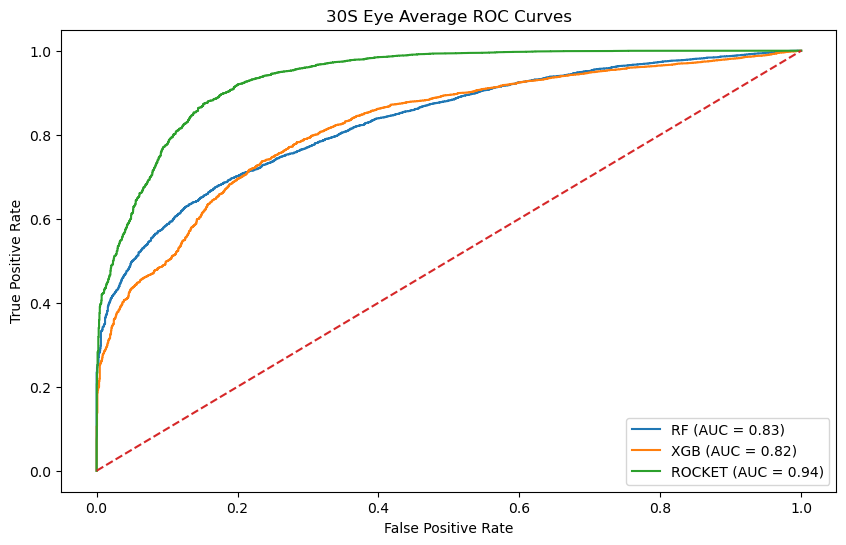

In [ ]:
# predicted probs for treatment = 1
prob_rf = stacked_results_rf['predicted_prob']  
prob_xgb = stacked_results_xgb['predicted_prob'] 
prob_rocket = stacked_results_rocket['predicted_prob']

# getting roc measures for random forest
false_pos_rate_rf, true_pos_rate_rf, thresh = roc_curve(stacked_results_rf['target'], prob_rf)
auc_rf_30s = roc_auc_score(stacked_results_rf['target'], prob_rf)

# getting roc measures XGBoost
false_pos_rate_xgb, true_pos_rate_xgb, thresh1 = roc_curve(stacked_results_xgb['target'], prob_xgb)
auc_xgb_30s = roc_auc_score(stacked_results_xgb['target'], prob_xgb)

# getting roc measures for ROCKET
false_pos_rate_rocket, true_pos_rate_rocket, thresh2 = roc_curve(stacked_results_rocket['target'], prob_rocket)
auc_rocket_30s = roc_auc_score(stacked_results_rocket['target'], prob_rocket)

plt.figure(figsize=(10, 6))

# roc for random forest
plt.plot(false_pos_rate_rf, true_pos_rate_rf, label=f'RF (AUC = {auc_rf_30s:.2f})')

# roc for xgboost
plt.plot(false_pos_rate_xgb, true_pos_rate_xgb, label=f'XGB (AUC = {auc_xgb_30s:.2f})')

# roc for ROCKET
plt.plot(false_pos_rate_rocket, true_pos_rate_rocket, label=f'ROCKET (AUC = {auc_rocket_30s:.2f})')

# random prediction line
plt.plot([0, 1], [0, 1], linestyle='--')

# labels for graph
plt.title('30S Eye Average ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# loading the results for random forest and xgboost
# 45s
results1_rf = pd.read_csv("rf_results1.csv")
results2_rf = pd.read_csv("rf_results2.csv")
results3_rf = pd.read_csv("rf_results3.csv")
results4_rf = pd.read_csv("rf_results4.csv")
results5_rf = pd.read_csv("rf_results5.csv")
results6_rf = pd.read_csv("rf_results6.csv")
results7_rf = pd.read_csv("rf_results7.csv")
results8_rf = pd.read_csv("rf_results8.csv")
results9_rf = pd.read_csv("rf_results9.csv")
results10_rf = pd.read_csv("rf_results10.csv")


results1_xgb = pd.read_csv("xgb_results1.csv")
results2_xgb = pd.read_csv("xgb_results2.csv")
results3_xgb = pd.read_csv("xgb_results3.csv")
results4_xgb = pd.read_csv("xgb_results4.csv")
results5_xgb = pd.read_csv("xgb_results5.csv")
results6_xgb = pd.read_csv("xgb_results6.csv")
results7_xgb = pd.read_csv("xgb_results7.csv")
results8_xgb = pd.read_csv("xgb_results8.csv")
results9_xgb = pd.read_csv("xgb_results9.csv")
results10_xgb = pd.read_csv("xgb_results10.csv")

results1_rocket = pd.read_csv("rocketresults_combined1.csv")
results2_rocket = pd.read_csv("rocketresults_combined2.csv")
results3_rocket = pd.read_csv("rocketresults_combined3.csv")
results4_rocket = pd.read_csv("rocketresults_combined4.csv")
results5_rocket = pd.read_csv("rocketresults_combined5.csv")
results6_rocket = pd.read_csv("rocketresults_combined6.csv")
results7_rocket = pd.read_csv("rocketresults_combined7.csv")
results8_rocket = pd.read_csv("rocketresults_combined8.csv")
results9_rocket = pd.read_csv("rocketresults_combined9.csv")
results10_rocket = pd.read_csv("rocketresults_combined10.csv")


In [ ]:
results_list_rf = [results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                results6_rf, results7_rf, results8_rf, results9_rf, results10_rf]

results_list_xgb = [results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb]
results_list_rocket = [results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket]

sdev3_rf = std_dev_10splits(results_list_rf)
sdev3_xgb = std_dev_10splits(results_list_xgb)
sdev3_rocket = std_dev_10splits(results_list_rocket)

In [ ]:
stacked_results_rf = pd.concat([results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                               results6_rf, results7_rf, results8_rf, results9_rf, results10_rf], axis = 0)

stacked_results_xgb = pd.concat([results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb], axis = 0)
stacked_results_rocket = pd.concat([results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket], axis = 0)

In [ ]:
stacked_results_xgb

,sample_ID,predicted_prob,target,pred
0,13_10_3A,0.998873,1.0,1
1,13_11_3A,0.996826,1.0,1
2,13_12_3A,0.995483,1.0,1
3,13_13_3A,0.998451,1.0,1
4,13_14_3A,0.991974,1.0,1
...,...,...,...,...
1284,20_5_3B,0.999894,1.0,1
1285,20_6_3B,0.999959,1.0,1
1286,20_7_3B,0.999477,1.0,1
1287,20_8_3B,0.999699,1.0,1


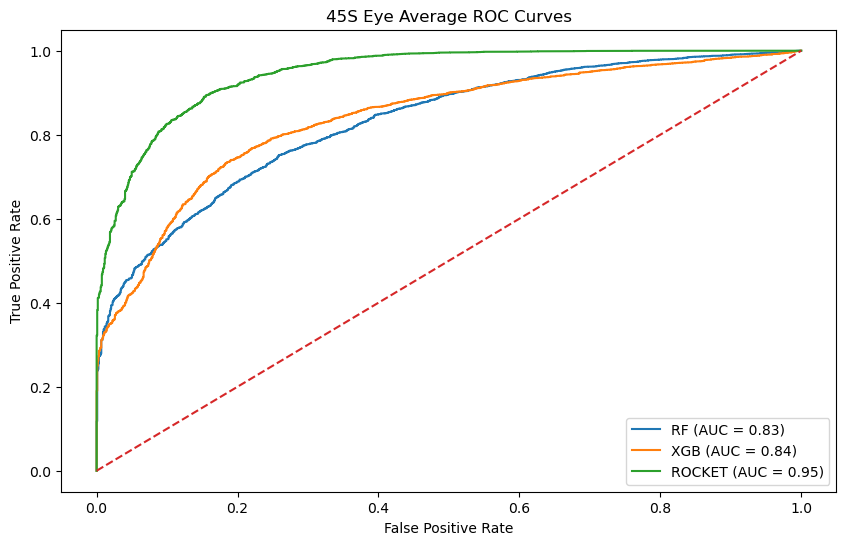

In [ ]:
# predicted probs for treatment = 1
prob_rf = stacked_results_rf['predicted_prob']  
prob_xgb = stacked_results_xgb['predicted_prob'] 
prob_rocket = stacked_results_rocket['predicted_prob']

# getting roc measures for random forest
false_pos_rate_rf, true_pos_rate_rf, thresh = roc_curve(stacked_results_rf['target'], prob_rf)
auc_rf_45s = roc_auc_score(stacked_results_rf['target'], prob_rf)

# getting roc measures XGBoost
false_pos_rate_xgb, true_pos_rate_xgb, thresh1 = roc_curve(stacked_results_xgb['target'], prob_xgb)
auc_xgb_45s = roc_auc_score(stacked_results_xgb['target'], prob_xgb)

# getting roc measures for ROCKET
false_pos_rate_rocket, true_pos_rate_rocket, thresh2 = roc_curve(stacked_results_rocket['target'], prob_rocket)
auc_rocket_45s = roc_auc_score(stacked_results_rocket['target'], prob_rocket)

plt.figure(figsize=(10, 6))

# roc for random forest
plt.plot(false_pos_rate_rf, true_pos_rate_rf, label=f'RF (AUC = {auc_rf_45s:.2f})')

# roc for xgboost
plt.plot(false_pos_rate_xgb, true_pos_rate_xgb, label=f'XGB (AUC = {auc_xgb_45s:.2f})')

# roc for ROCKET
plt.plot(false_pos_rate_rocket, true_pos_rate_rocket, label=f'ROCKET (AUC = {auc_rocket_45s:.2f})')

# random prediction line
plt.plot([0, 1], [0, 1], linestyle='--')

# labels for graph
plt.title('45S Eye Average ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# loading the results for random forest and xgboost
# 60s
results1_rf = pd.read_csv("rf_results1.csv")
results2_rf = pd.read_csv("rf_results2.csv")
results3_rf = pd.read_csv("rf_results3.csv")
results4_rf = pd.read_csv("rf_results4.csv")
results5_rf = pd.read_csv("rf_results5.csv")
results6_rf = pd.read_csv("rf_results6.csv")
results7_rf = pd.read_csv("rf_results7.csv")
results8_rf = pd.read_csv("rf_results8.csv")
results9_rf = pd.read_csv("rf_results9.csv")
results10_rf = pd.read_csv("rf_results10.csv")


results1_xgb = pd.read_csv("xgb_results1.csv")
results2_xgb = pd.read_csv("xgb_results2.csv")
results3_xgb = pd.read_csv("xgb_results3.csv")
results4_xgb = pd.read_csv("xgb_results4.csv")
results5_xgb = pd.read_csv("xgb_results5.csv")
results6_xgb = pd.read_csv("xgb_results6.csv")
results7_xgb = pd.read_csv("xgb_results7.csv")
results8_xgb = pd.read_csv("xgb_results8.csv")
results9_xgb = pd.read_csv("xgb_results9.csv")
results10_xgb = pd.read_csv("xgb_results10.csv")

results1_rocket = pd.read_csv("rocketresults_combined1.csv")
results2_rocket = pd.read_csv("rocketresults_combined2.csv")
results3_rocket = pd.read_csv("rocketresults_combined3.csv")
results4_rocket = pd.read_csv("rocketresults_combined4.csv")
results5_rocket = pd.read_csv("rocketresults_combined5.csv")
results6_rocket = pd.read_csv("rocketresults_combined6.csv")
results7_rocket = pd.read_csv("rocketresults_combined7.csv")
results8_rocket = pd.read_csv("rocketresults_combined8.csv")
results9_rocket = pd.read_csv("rocketresults_combined9.csv")
results10_rocket = pd.read_csv("rocketresults_combined10.csv")


In [ ]:
results_list_rf = [results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                results6_rf, results7_rf, results8_rf, results9_rf, results10_rf]

results_list_xgb = [results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb]

results_list_rocket = [results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket]

sdev4_rf = std_dev_10splits(results_list_rf)
sdev4_xgb = std_dev_10splits(results_list_xgb)
sdev4_rocket = std_dev_10splits(results_list_rocket)

In [ ]:
stacked_results_rf = pd.concat([results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                               results6_rf, results7_rf, results8_rf, results9_rf, results10_rf], axis = 0)

stacked_results_xgb = pd.concat([results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb], axis = 0)

stacked_results_rocket = pd.concat([results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket], axis = 0)

In [ ]:
stacked_results_xgb

,sample_ID,predicted_prob,target,pred
0,13_10_3A,0.999944,1,1
1,13_11_3A,0.999946,1,1
2,13_12_3A,0.999885,1,1
3,13_13_3A,0.999964,1,1
4,13_14_3A,0.999986,1,1
...,...,...,...,...
968,20_5_3B,0.999954,1,1
969,20_6_3B,0.999819,1,1
970,20_7_3B,0.999934,1,1
971,20_8_3B,0.999183,1,1


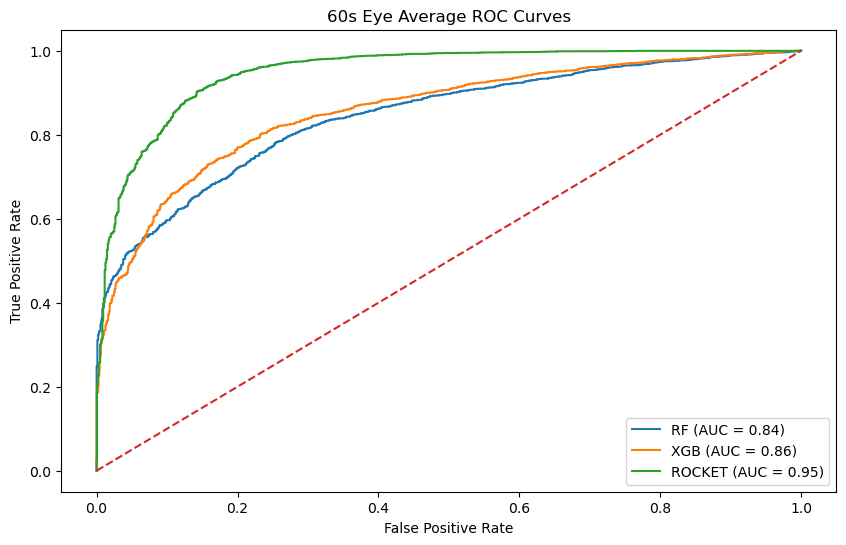

In [ ]:
# predicted probs for treatment = 1
prob_rf = stacked_results_rf['predicted_prob']  
prob_xgb = stacked_results_xgb['predicted_prob'] 
prob_rocket = stacked_results_rocket['predicted_prob']

# getting roc measures for random forest
false_pos_rate_rf, true_pos_rate_rf, thresh = roc_curve(stacked_results_rf['target'], prob_rf)
auc_rf_60s = roc_auc_score(stacked_results_rf['target'], prob_rf)

# getting roc measures XGBoost
false_pos_rate_xgb, true_pos_rate_xgb, thresh1 = roc_curve(stacked_results_xgb['target'], prob_xgb)
auc_xgb_60s = roc_auc_score(stacked_results_xgb['target'], prob_xgb)

# getting roc measures for ROCKET
false_pos_rate_rocket, true_pos_rate_rocket, thresh2 = roc_curve(stacked_results_rocket['target'], prob_rocket)
auc_rocket_60s = roc_auc_score(stacked_results_rocket['target'], prob_rocket)


plt.figure(figsize=(10, 6))

# roc for random forest
plt.plot(false_pos_rate_rf, true_pos_rate_rf, label=f'RF (AUC = {auc_rf_60s:.2f})')

# roc for xgboost
plt.plot(false_pos_rate_xgb, true_pos_rate_xgb, label=f'XGB (AUC = {auc_xgb_60s:.2f})')

# roc for ROCKET
plt.plot(false_pos_rate_rocket, true_pos_rate_rocket, label=f'ROCKET (AUC = {auc_rocket_60s:.2f})')

# random prediction line
plt.plot([0, 1], [0, 1], linestyle='--')

# labels for graph
plt.title('60s Eye Average ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# loading the results for random forest and xgboost
# 75s
results1_rf = pd.read_csv("rf_results1.csv")
results2_rf = pd.read_csv("rf_results2.csv")
results3_rf = pd.read_csv("rf_results3.csv")
results4_rf = pd.read_csv("rf_results4.csv")
results5_rf = pd.read_csv("rf_results5.csv")
results6_rf = pd.read_csv("rf_results6.csv")
results7_rf = pd.read_csv("rf_results7.csv")
results8_rf = pd.read_csv("rf_results8.csv")
results9_rf = pd.read_csv("rf_results9.csv")
results10_rf = pd.read_csv("rf_results10.csv")


results1_xgb = pd.read_csv("xgb_results1.csv")
results2_xgb = pd.read_csv("xgb_results2.csv")
results3_xgb = pd.read_csv("xgb_results3.csv")
results4_xgb = pd.read_csv("xgb_results4.csv")
results5_xgb = pd.read_csv("xgb_results5.csv")
results6_xgb = pd.read_csv("xgb_results6.csv")
results7_xgb = pd.read_csv("xgb_results7.csv")
results8_xgb = pd.read_csv("xgb_results8.csv")
results9_xgb = pd.read_csv("xgb_results9.csv")
results10_xgb = pd.read_csv("xgb_results10.csv")

results1_rocket = pd.read_csv("rocketresults_combined1.csv")
results2_rocket = pd.read_csv("rocketresults_combined2.csv")
results3_rocket = pd.read_csv("rocketresults_combined3.csv")
results4_rocket = pd.read_csv("rocketresults_combined4.csv")
results5_rocket = pd.read_csv("rocketresults_combined5.csv")
results6_rocket = pd.read_csv("rocketresults_combined6.csv")
results7_rocket = pd.read_csv("rocketresults_combined7.csv")
results8_rocket = pd.read_csv("rocketresults_combined8.csv")
results9_rocket = pd.read_csv("rocketresults_combined9.csv")
results10_rocket = pd.read_csv("rocketresults_combined10.csv")


In [ ]:
results_list_rf = [results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                results6_rf, results7_rf, results8_rf, results9_rf, results10_rf]

results_list_xgb = [results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb]

results_list_rocket = [results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket]

sdev5_rf = std_dev_10splits(results_list_rf)
sdev5_xgb = std_dev_10splits(results_list_xgb)
sdev5_rocket = std_dev_10splits(results_list_rocket)

In [ ]:
stacked_results_rf = pd.concat([results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                               results6_rf, results7_rf, results8_rf, results9_rf, results10_rf], axis = 0)

stacked_results_xgb = pd.concat([results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb], axis = 0)
stacked_results_rocket = pd.concat([results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket], axis = 0)

In [ ]:
stacked_results_xgb

,sample_ID,predicted_prob,target,pred
0,13_10_3A,0.999675,1,1
1,13_11_3A,0.999379,1,1
2,13_12_3A,0.999503,1,1
3,13_13_3A,0.999534,1,1
4,13_14_3A,0.998956,1,1
...,...,...,...,...
760,20_5_3B,0.999308,1,1
761,20_6_3B,0.999201,1,1
762,20_7_3B,0.999448,1,1
763,20_8_3B,0.999773,1,1


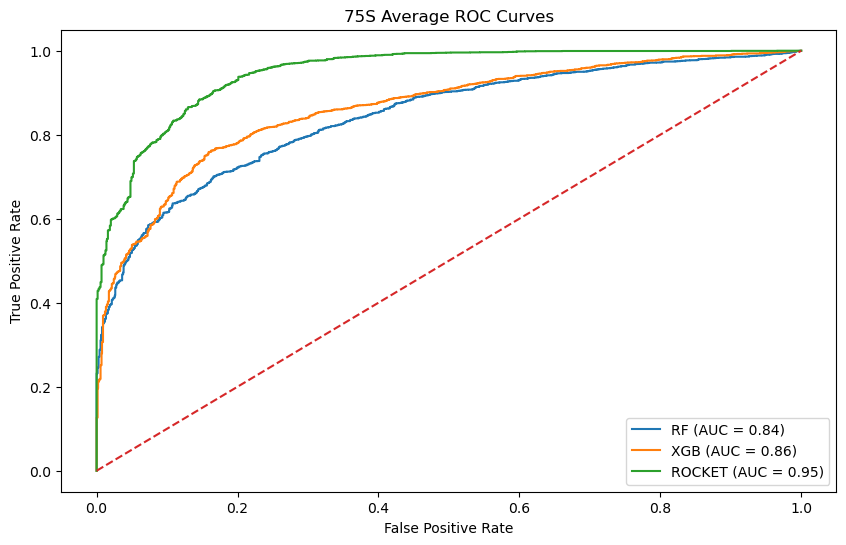

In [ ]:
# predicted probs for treatment = 1
prob_rf = stacked_results_rf['predicted_prob']  
prob_xgb = stacked_results_xgb['predicted_prob'] 
prob_rocket = stacked_results_rocket['predicted_prob']

# getting roc measures for random forest
false_pos_rate_rf, true_pos_rate_rf, thresh = roc_curve(stacked_results_rf['target'], prob_rf)
auc_rf_75s = roc_auc_score(stacked_results_rf['target'], prob_rf)

# getting roc measures XGBoost
false_pos_rate_xgb, true_pos_rate_xgb, thresh1 = roc_curve(stacked_results_xgb['target'], prob_xgb)
auc_xgb_75s = roc_auc_score(stacked_results_xgb['target'], prob_xgb)

# getting roc measures for ROCKET
false_pos_rate_rocket, true_pos_rate_rocket, thresh2 = roc_curve(stacked_results_rocket['target'], prob_rocket)
auc_rocket_75s = roc_auc_score(stacked_results_rocket['target'], prob_rocket)

plt.figure(figsize=(10, 6))

# roc for random forest
plt.plot(false_pos_rate_rf, true_pos_rate_rf, label=f'RF (AUC = {auc_rf_75s:.2f})')

# roc for xgboost
plt.plot(false_pos_rate_xgb, true_pos_rate_xgb, label=f'XGB (AUC = {auc_xgb_75s:.2f})')

# roc for ROCKET
plt.plot(false_pos_rate_rocket, true_pos_rate_rocket, label=f'ROCKET (AUC = {auc_rocket_75s:.2f})')

# random prediction line
plt.plot([0, 1], [0, 1], linestyle='--')

# labels for graph
plt.title('75S Average ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:
# loading the results for random forest and xgboost
# 90s
results1_rf = pd.read_csv("rf_results1.csv")
results2_rf = pd.read_csv("rf_results2.csv")
results3_rf = pd.read_csv("rf_results3.csv")
results4_rf = pd.read_csv("rf_results4.csv")
results5_rf = pd.read_csv("rf_results5.csv")
results6_rf = pd.read_csv("rf_results6.csv")
results7_rf = pd.read_csv("rf_results7.csv")
results8_rf = pd.read_csv("rf_results8.csv")
results9_rf = pd.read_csv("rf_results9.csv")
results10_rf = pd.read_csv("rf_results10.csv")


results1_xgb = pd.read_csv("xgb_results1.csv")
results2_xgb = pd.read_csv("xgb_results2.csv")
results3_xgb = pd.read_csv("xgb_results3.csv")
results4_xgb = pd.read_csv("xgb_results4.csv")
results5_xgb = pd.read_csv("xgb_results5.csv")
results6_xgb = pd.read_csv("xgb_results6.csv")
results7_xgb = pd.read_csv("xgb_results7.csv")
results8_xgb = pd.read_csv("xgb_results8.csv")
results9_xgb = pd.read_csv("xgb_results9.csv")
results10_xgb = pd.read_csv("xgb_results10.csv")

results1_rocket = pd.read_csv("rocketresults_combined1.csv")
results2_rocket = pd.read_csv("rocketresults_combined2.csv")
results3_rocket = pd.read_csv("rocketresults_combined3.csv")
results4_rocket = pd.read_csv("rocketresults_combined4.csv")
results5_rocket = pd.read_csv("rocketresults_combined5.csv")
results6_rocket = pd.read_csv("rocketresults_combined6.csv")
results7_rocket = pd.read_csv("rocketresults_combined7.csv")
results8_rocket = pd.read_csv("rocketresults_combined8.csv")
results9_rocket = pd.read_csv("rocketresults_combined9.csv")
results10_rocket = pd.read_csv("rocketresults_combined10.csv")


In [ ]:
results_list_rf = [results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                results6_rf, results7_rf, results8_rf, results9_rf, results10_rf]

results_list_xgb = [results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb]

results_list_rocket = [results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket]

sdev6_rf = std_dev_10splits(results_list_rf)
sdev6_xgb = std_dev_10splits(results_list_xgb)
sdev6_rocket = std_dev_10splits(results_list_rocket)

In [ ]:
stacked_results_rf = pd.concat([results1_rf, results2_rf, results3_rf, results4_rf, results5_rf,
                               results6_rf, results7_rf, results8_rf, results9_rf, results10_rf], axis = 0)

stacked_results_xgb = pd.concat([results1_xgb, results2_xgb, results3_xgb, results4_xgb, results5_xgb,
                               results6_xgb, results7_xgb, results8_xgb, results9_xgb, results10_xgb], axis = 0)

stacked_results_rocket = pd.concat([results1_rocket, results2_rocket, results3_rocket, results4_rocket, results5_rocket,
                               results6_rocket, results7_rocket, results8_rocket, results9_rocket, results10_rocket], axis = 0)

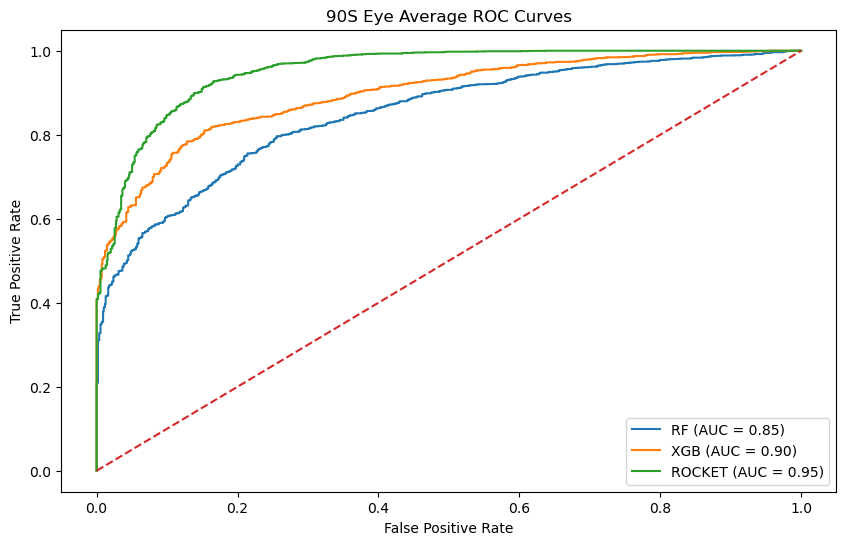

In [ ]:
# predicted probs for treatment = 1
prob_rf = stacked_results_rf['predicted_prob']  
prob_xgb = stacked_results_xgb['predicted_prob'] 
prob_rocket = stacked_results_rocket['predicted_prob']

# getting roc measures for random forest
false_pos_rate_rf, true_pos_rate_rf, thresh = roc_curve(stacked_results_rf['target'], prob_rf)
auc_rf_90s = roc_auc_score(stacked_results_rf['target'], prob_rf)

# getting roc measures XGBoost
false_pos_rate_xgb, true_pos_rate_xgb, thresh1 = roc_curve(stacked_results_xgb['target'], prob_xgb)
auc_xgb_90s = roc_auc_score(stacked_results_xgb['target'], prob_xgb)

# getting roc measures for ROCKET
false_pos_rate_rocket, true_pos_rate_rocket, thresh2 = roc_curve(stacked_results_rocket['target'], prob_rocket)
auc_rocket_90s = roc_auc_score(stacked_results_rocket['target'], prob_rocket)

plt.figure(figsize=(10, 6))

# roc for random forest
plt.plot(false_pos_rate_rf, true_pos_rate_rf, label=f'RF (AUC = {auc_rf_90s:.2f})')

# roc for xgboost
plt.plot(false_pos_rate_xgb, true_pos_rate_xgb, label=f'XGB (AUC = {auc_xgb_90s:.2f})')

# roc for ROCKET
plt.plot(false_pos_rate_rocket, true_pos_rate_rocket, label=f'ROCKET (AUC = {auc_rocket_90s:.2f})')

# random prediction line
plt.plot([0, 1], [0, 1], linestyle='--')

# labels for graph
plt.title('90S Eye Average ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

In [ ]:

auc_xgb_values = [auc_xgb_15s, auc_xgb_30s, auc_xgb_45s, auc_xgb_60s, auc_xgb_75s, auc_xgb_90s]

In [ ]:
# binding rf auc values
auc_rf_values = [auc_rf_15s, auc_rf_30s, auc_rf_45s, auc_rf_60s, auc_rf_75s, auc_rf_90s]


[0.8039539895608061,
 0.8309731320719187,
 0.829918168268381,
 0.8442970231347643,
 0.8430511299124639,
 0.8491304942301964]

In [ ]:
# binding ROCKET auc values
auc_rocket_values = [auc_rocket_15s, auc_rocket_30s, auc_rocket_45s, auc_rocket_60s, auc_rocket_75s, auc_rocket_90s]

[0.9038526805394483,
 0.9355176681981956,
 0.9464472610299095,
 0.9489502513014395,
 0.9480904827416857,
 0.9525086725305125]

In [ ]:
# combining all auc values
auc_total = auc_xgb_values + auc_rf_values + auc_rocket_values

[0.7711000027949925,
 0.8226217093286265,
 0.8394166451776166,
 0.8579197917038442,
 0.8629422590924074,
 0.8977283605740727,
 0.8039539895608061,
 0.8309731320719187,
 0.829918168268381,
 0.8442970231347643,
 0.8430511299124639,
 0.8491304942301964,
 0.9038526805394483,
 0.9355176681981956,
 0.9464472610299095,
 0.9489502513014395,
 0.9480904827416857,
 0.9525086725305125]

In [ ]:
# making dataframe structure
time_intervals = ["15", "30", "45", "60", "75", "90", "15", "30", "45", "60", "75", "90", "15", "30", "45", "60", "75", "90"]
model = ["XGBoost", "XGBoost", "XGBoost","XGBoost","XGBoost","XGBoost", "Random Forest","Random Forest","Random Forest","Random Forest","Random Forest","Random Forest", "ROCKET","ROCKET","ROCKET","ROCKET","ROCKET","ROCKET"]

In [ ]:
# storing auc standard deviations
auc_sd_rf = [sdev1_rf,sdev2_rf,sdev3_rf,sdev4_rf,sdev5_rf,sdev6_rf]
auc_sd_xgb = [sdev1_xgb,sdev2_xgb,sdev3_xgb,sdev4_xgb,sdev5_xgb,sdev6_xgb]
auc_sd_rocket = [sdev1_rocket,sdev2_rocket,sdev3_rocket,sdev4_rocket,sdev5_rocket,sdev6_rocket]
auc_sd_total = auc_sd_rf + auc_sd_xgb+ auc_sd_rocket

In [ ]:
# making the dataframe for results
auc_results = pd.DataFrame({
    'time': time_intervals,
    'auc': auc_total,
    'model': model,
    'predictors': "Combined",
    'sd' : auc_sd_total
})

In [ ]:
# saving csv file
auc_results.to_csv('auc_results_comb.csv', index=False)